K-means Cluster to detect all the colours and represent it using a pie chart

[array([47.92050615, 88.36280713, 76.63408765]),
 array([242.60400167, 252.69287203, 251.92696957]),
 array([149.6710126 , 181.64754455, 173.31290743]),
 array([30.4191959 , 62.86401261, 53.56011037]),
 array([ 87.0979206 , 121.04877127, 111.77693762]),
 array([214.21605293, 242.41915995, 235.89902186]),
 array([179.36790393, 209.60953421, 201.98216885]),
 array([40.75062484, 93.61466709, 77.68360414]),
 array([57.46934171, 99.31423526, 87.35073089]),
 array([118.390625  , 150.8125    , 142.12304687])]

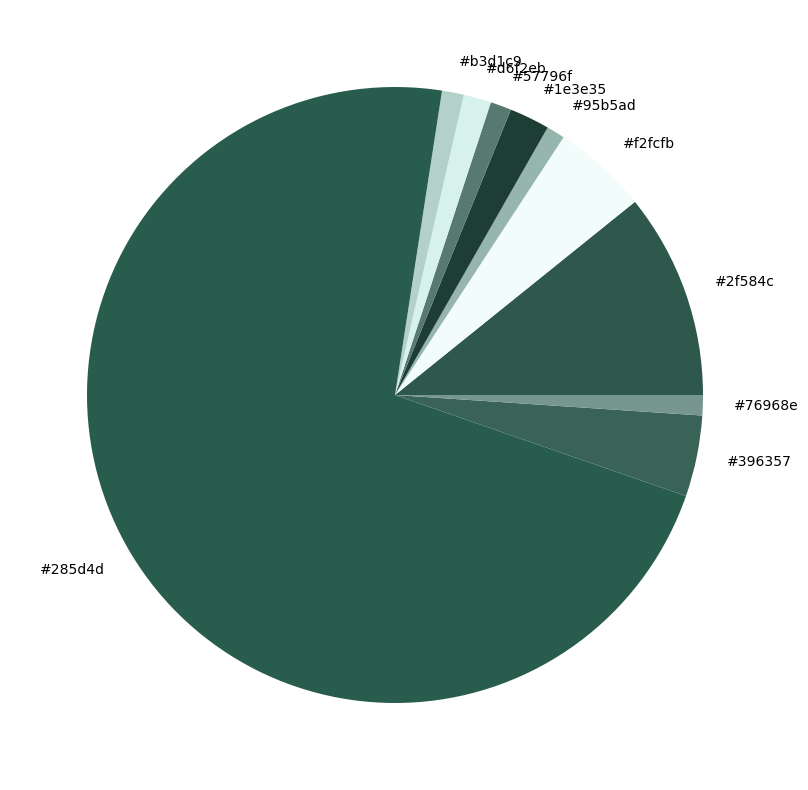

In [65]:
#Code from https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (10, 10))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


get_colors(get_image('C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'), 10, True)

#Looking for 40,92,77 or #285C4D

[array([35.04360916, 31.0140925 , 31.99262373]),
 array([226.43034826, 228.6840796 , 224.91791045]),
 array([240.94127595, 155.04552689,  68.0116387 ]),
 array([159.92056856, 158.77173913, 160.25      ]),
 array([98.84325323, 91.5116451 , 91.83585952]),
 array([157.82555879,  98.44071914,  46.17492711]),
 array([254.95000506, 254.96234345, 254.9498194 ]),
 array([205.30121816, 175.59246955, 151.7076412 ]),
 array([223.36541374, 131.67065951,  49.20817844]),
 array([116.04701699, 186.12801264, 158.59344133]),
 array([86.32619279, 60.76338851, 42.1684518 ]),
 array([196.56927427, 193.88124411, 191.37700283]),
 array([36.59392988, 61.87964417, 61.63579278]),
 array([123.68098592, 117.14788732, 117.60774648]),
 array([199.93658537, 159.19804878,  93.94341463]),
 array([177.31125828, 210.45916115, 132.02869757]),
 array([107.20722433,  73.79277567,  46.8973384 ]),
 array([208.40998487, 209.54803328, 208.66868381]),
 array([201.54152334, 122.6982801 ,  51.14742015]),
 array([85.87742546, 79.

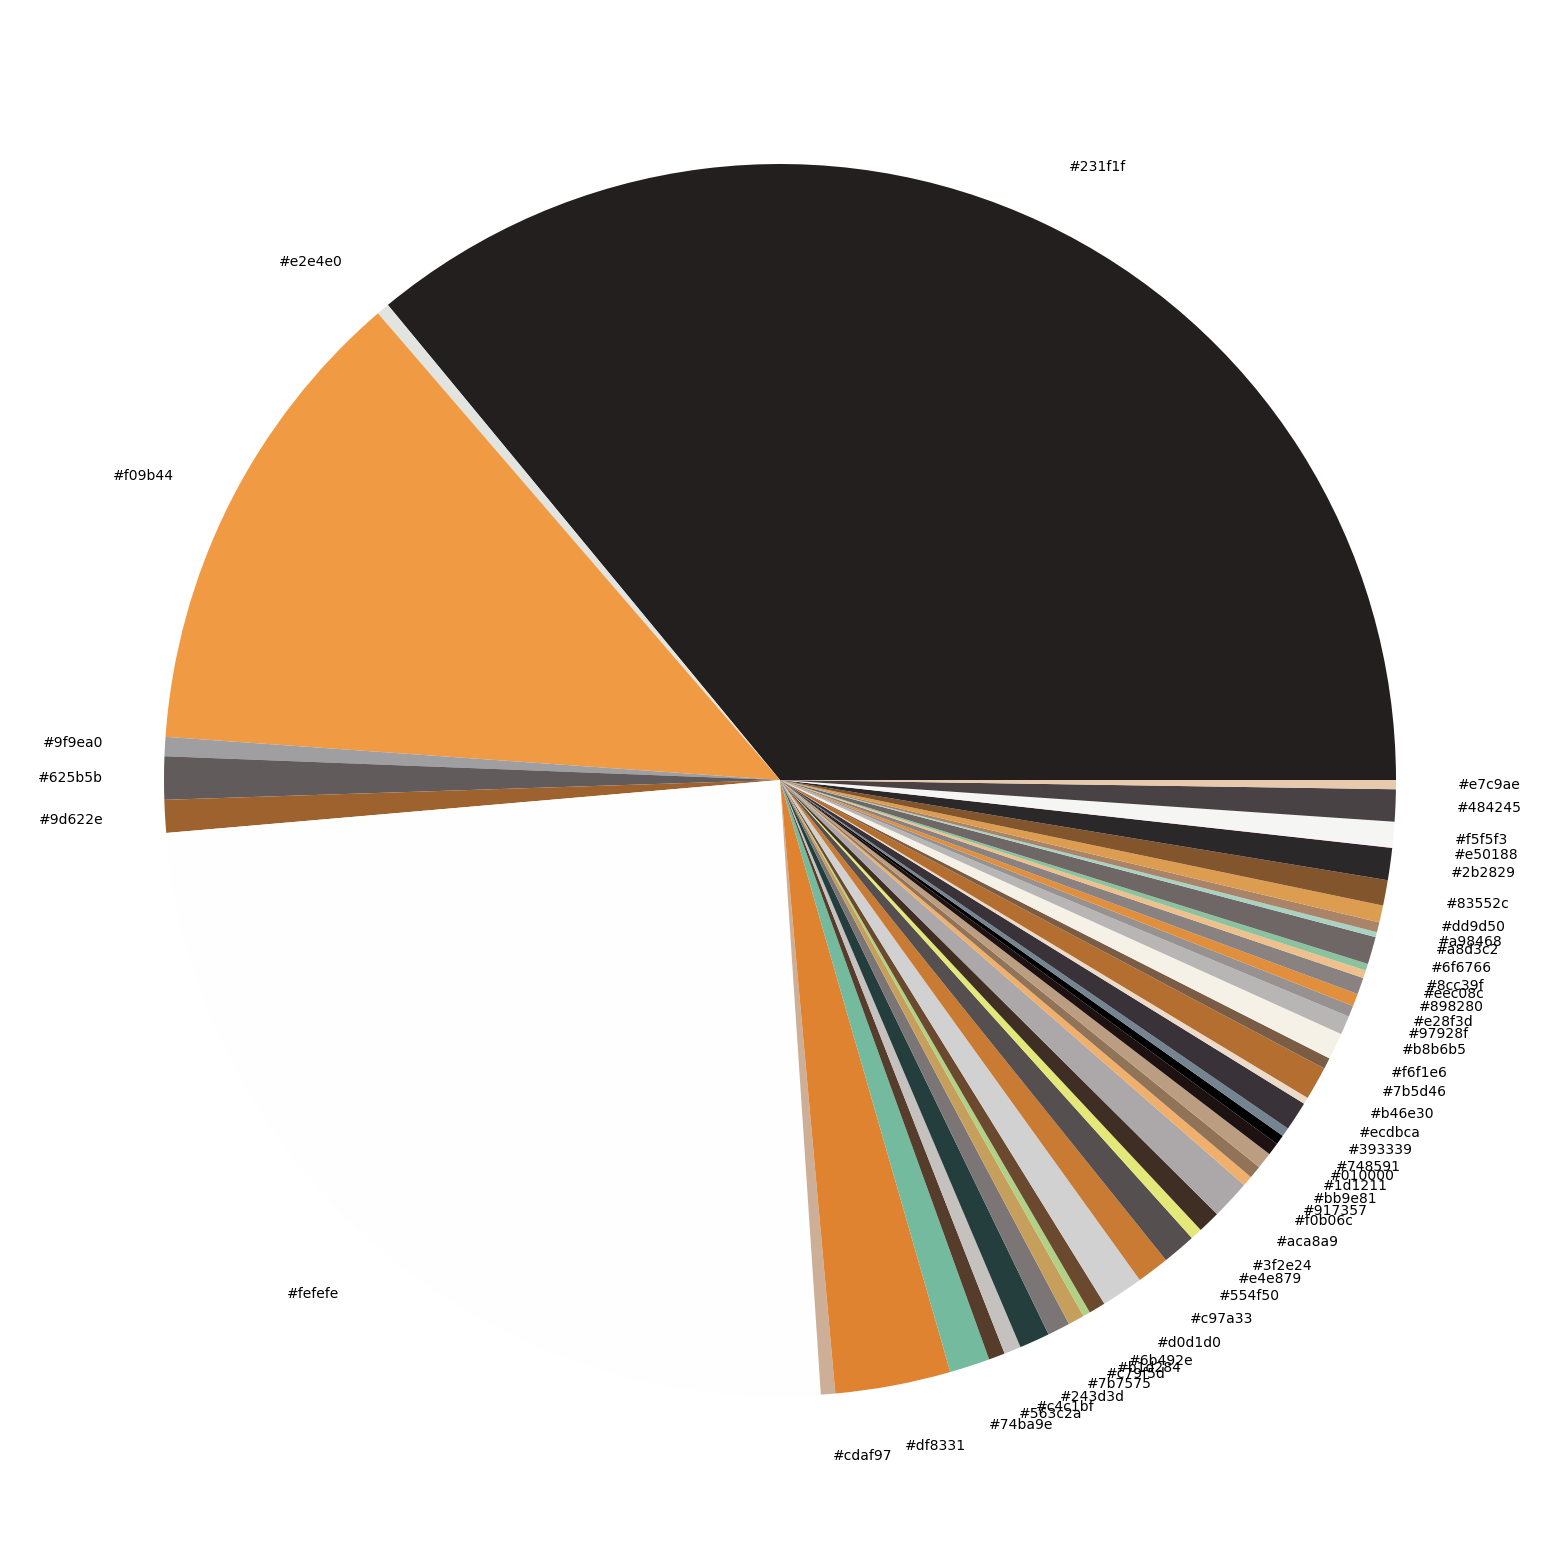

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (20, 15))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


get_colors(get_image('C:/Users/Mylu/Downloads/test/pagewithgreen.jpg'), 50, True)
#Looking for 40,92,77 or #285C4D

ColorThief Implementation 

(44, 91, 76) Dominant Color (Quality 1)
[(43, 91, 76), (224, 242, 239), (143, 184, 172), (117, 150, 142), (24, 44, 39), (100, 129, 122), (140, 172, 164), (92, 132, 124), (12, 60, 44)]


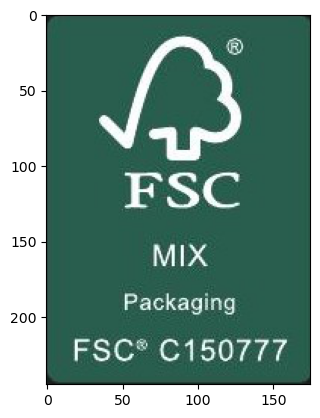

In [41]:
from colorthief import ColorThief
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

imagepath='C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'
img = np.asarray(Image.open(imagepath))

color_thief = ColorThief(imagepath)

#get the dominant color
dominant_color = color_thief.get_color(quality=1)

#build a color palette
palette = color_thief.get_palette(color_count=10)

print(dominant_color,"Dominant Color (Quality 1)")
print(palette)

plt.imshow(img)


#626C PANTONE GREEN RGB VALUE IS : 40,92,77

This is the implementation using Pillow


In [3]:
import matplotlib.pyplot as plt
from PIL import Image

#Code is from https://shegocodes.medium.com/extracting-all-colors-in-images-with-python-2e36eb8a67d2

image_path='C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'
image_pathgp='C:/Users/Mylu/Downloads/test/fsclogo_gp.jpeg'
image_pathbp='C:/Users/Mylu/Downloads/test/fsclogo_bp.jpeg' 


def resize_image(width, height, threshold):
    """
    Function takes in an image's original dimensions and returns the 
    new width and height while maintaining its aspect ratio where 
    both are below the threshold. Purpose is to reduce runtime and 
    not distort the original image too much. 
    
    Parameters
    ----------
    width : int
        original width of image
    height : int 
        original height of image
    threshold : int
        max dimension size for both width and height
    """
    if (width > threshold) or (height > threshold):
        max_dim = max(width, height)
        if height == max_dim:
            new_width = int((width * threshold) / height)
            new_height = threshold
        if width == max_dim:
            new_height = int((height * threshold) / width)
            new_width = threshold
        return new_height, new_width
    else: return height, width

def detect_colors(image_path):
    """
    Function returns colors detected in image. 
    
    Parameters
    ----------
    image_path : str
        path to imagefile for detection
        
    Return
    ------
    sorted list of tuples (color, total number detections) 
    """
    
    # Read image
    image = Image.open(image_path)
    
    # Convert image into RGB
    image = image.convert('RGB')    # Get width and height of image
    width, height = image.size
    print(f'Original dimensions: {width} x {height}')
    
    # Resize image to improve runtime
    width, height = resize_image(width, height, threshold=100)
    print(f'New dimensions: {width} x {height}')
    image = image.resize((width, height))
 
    # Iterate through each pixel
    detected_colors = {} # hash-map
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = image.getpixel((x, y))
            rgb = f'{r}:{g}:{b}'
            if rgb in detected_colors:
                detected_colors[rgb] += 1
            else: 
                detected_colors[rgb] = 1
 
    # Sort colors from most common to least common
    detected_colors = sorted(detected_colors.items(), key=lambda x:x[1], reverse=True)
    return detected_colors

detected_Colors=detect_colors(image_path)
detected_Colors

#original_image = Image.open(image_path)
#testimage = original_image.convert('RGB')
#plt.imshow(testimage)

Original dimensions: 175 x 245
New dimensions: 100 x 71


[('41:94:78', 2117),
 ('40:94:78', 468),
 ('42:93:78', 402),
 ('41:93:78', 122),
 ('39:94:78', 117),
 ('44:92:78', 96),
 ('37:95:78', 69),
 ('41:94:77', 69),
 ('38:94:78', 67),
 ('38:95:78', 65),
 ('42:94:78', 64),
 ('41:94:76', 62),
 ('255:255:255', 59),
 ('44:91:75', 59),
 ('44:94:79', 58),
 ('44:82:71', 57),
 ('40:96:77', 57),
 ('39:95:75', 57),
 ('42:79:66', 56),
 ('44:77:68', 51),
 ('49:90:79', 51),
 ('39:95:78', 51),
 ('43:93:78', 50),
 ('40:93:77', 42),
 ('41:95:79', 36),
 ('40:95:78', 32),
 ('43:94:79', 28),
 ('43:92:78', 27),
 ('41:92:77', 27),
 ('42:95:79', 27),
 ('40:95:79', 23),
 ('41:93:77', 22),
 ('36:96:78', 22),
 ('37:96:78', 22),
 ('42:94:79', 22),
 ('39:93:77', 19),
 ('45:91:78', 17),
 ('40:91:76', 16),
 ('43:94:78', 15),
 ('42:92:77', 13),
 ('41:95:78', 13),
 ('38:90:75', 13),
 ('38:94:77', 13),
 ('38:89:74', 13),
 ('253:255:255', 13),
 ('43:91:77', 13),
 ('41:79:66', 12),
 ('40:92:77', 12),
 ('45:92:78', 12),
 ('38:91:75', 12),
 ('39:90:75', 11),
 ('37:89:74', 11),
